1. Introduction of SVM

SVM is used for mapping the data into high-dimensional space so that data points can be segrigated into different classes even when the data points are not linearly separable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('E:\Master of Science\Semester 1\ML\Assignment\Practical Assignment\practical\samples.csv')

df.shape
df.tail()
df.size
df.count
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

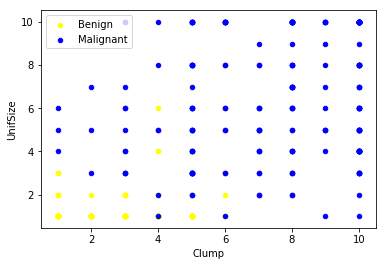

In [4]:
%matplotlib inline

benign_df = df[df['Class']==2][0:200]
malignant_df = df[df['Class']==4][0:200]

axes= benign_df.plot(kind= 'scatter', x='Clump', y='UnifSize', color = 'yellow', label = 'Benign')

malignant_df.plot(kind= 'scatter', x='Clump', y='UnifSize', color = 'blue', label = 'Malignant', ax = axes)
 

In [41]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [45]:
# Here we are just removing the non-numerical data and putting the numerical values.
# In order to this there is a method called 'to_numeric' in pandas library.

df = df[pd.to_numeric(df['BareNuc'],errors = 'coerce').notnull()]  # 'notnull' is a method used to pick only non missing rows

df['BareNuc']= df['BareNuc'].astype('int')   # 'astype' method insure that given argument converted into Integer value 
df.dtypes

# Below we can see 'BareNuc' has been converted into integer value.

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [46]:
df.columns
# [Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']
#   to make the independent variable, we should removed the column 'Id' and 'Class'   

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [53]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X = np.asarray(feature_df)   # Here 'X' denoting the independent variable without "ID' and 'Class'

# Dependent variable 'y'
y = np.asarray(df['Class'])

X[0:5]
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

Dividing the data into training dataset and testing datasets

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =4)  # random_state is use to generate the seed value that defines which value need to take as a training or testing.
X_train.shape
y_train.shape

(546,)

Modeling the SVM with Sickit-learn

In [61]:
from sklearn import svm

# SVM has multiple package and we will use SVC for classification
# kernel is funcation which sees data into different set dimensions.
# Basically mapping data into higher dimensional space is called kerneling
# For types of kernel supported in SVC i) Linear ii) Polynomial iii) RBF(Radial basis fuction) iv) Sigmoid
# Default kernel would be 'RBF' if we don't specify anything. Kernel coefficients are called gamma.
# Below 'C' denotes the panelty or cost that we want to impose on incorrectly placed data point w.r.t new hyper plane

classifier = svm.SVC(kernel='linear',gamma = 'auto',C=2)
classifier.fit(X_train, y_train)    # We put the X in capital because it denotes multi dimensional data and y in small because its just predicting the class
y_predict = classifier.predict(X_test) 

Evaluating the result/performance of model

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          2       1.00      0.94      0.97        90
          4       0.90      1.00      0.95        47

avg / total       0.97      0.96      0.96       137

